## Data Analysis and Visualization Capstone Project

### Overview

If you are planning on going out to see a movie, how well can you trust online reviews and ratings? Especially if the same company showing the rating also makes money by selling movie tickets. Do they have a bias towards rating movies higher than they should be rated?

### Goal:
**Your goal is to complete the tasks below based off the 538 article and see if you reach a similar conclusion. You will need to use your pandas and visualization skills to determine if Fandango's ratings in 2015 had a bias towards rating movies better to sell more tickets.**

---
----

**Complete the tasks written in bold.**

---
----

### Part One: Understanding The Background and Data

**TASK: Read this article: [Be Suspicious Of Online Movie Ratings, Especially Fandango’s](http://fivethirtyeight.com/features/fandango-movies-ratings/)**

----

**TASK: After reading the article, read these two tables giving an overview of the two .csv files we will be working with:**

### The Data

This is the data behind the story [Be Suspicious Of Online Movie Ratings, Especially Fandango’s](http://fivethirtyeight.com/features/fandango-movies-ratings/) openly available on 538's github: https://github.com/fivethirtyeight/data. There are two csv files, one with Fandango Stars and Displayed Ratings, and the other with aggregate data for movie ratings from other sites, like Metacritic,IMDB, and Rotten Tomatoes.

#### all_sites_scores.csv

-----
`all_sites_scores.csv` contains every film that has a Rotten Tomatoes rating, a RT User rating, a Metacritic score, a Metacritic User score, and IMDb score, and at least 30 fan reviews on Fandango. The data from Fandango was pulled on Aug. 24, 2015.

Column | Definition
--- | -----------
FILM | The film in question
RottenTomatoes | The Rotten Tomatoes Tomatometer score  for the film
RottenTomatoes_User | The Rotten Tomatoes user score for the film
Metacritic | The Metacritic critic score for the film
Metacritic_User | The Metacritic user score for the film
IMDB | The IMDb user score for the film
Metacritic_user_vote_count | The number of user votes the film had on Metacritic
IMDB_user_vote_count | The number of user votes the film had on IMDb

----
----

#### fandango_scape.csv

`fandango_scrape.csv` contains every film 538 pulled from Fandango.

Column | Definiton
--- | ---------
FILM | The movie
STARS | Number of stars presented on Fandango.com
RATING |  The Fandango ratingValue for the film, as pulled from the HTML of each page. This is the actual average score the movie obtained.
VOTES | number of people who had reviewed the film at the time we pulled it.

----

**TASK: Import any libraries you think you will use:**

In [1]:
# Libraries that are needed for analysis and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Part Two: Exploring Fandango Displayed Scores versus True User Ratings

Let's first explore the Fandango ratings to see if our analysis agrees with the article's conclusion.

**TASK: Run the cell below to read in the fandango_scrape.csv file**

In [2]:
fd = pd.read_csv('fandango_scrape.csv')

**TASK: Explore the DataFrame Properties and Head.**

In [3]:
fd.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [4]:
# Film - object, Stars - float, Rating - float, and Votes - int
fd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [5]:
print('The total rows and columns of Fandango CSV: ',fd.shape)

The total rows and columns of Fandango CSV:  (504, 4)


In [6]:
fd.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


**TASK: Let's explore the relationship between popularity of a film and its rating. Create a scatterplot showing the relationship between rating and votes. Feel free to edit visual styling to your preference.**

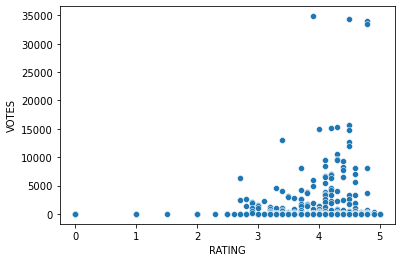

In [7]:
# Insights: No relationship between Votes and Ratings
sns.scatterplot(data=fd, x='RATING', y='VOTES');

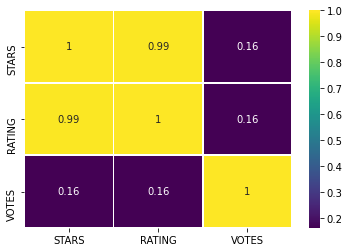

In [8]:
# Check if there's strong relationship between features
# Stars & Ratings had a strong relationship to each other
sns.heatmap(fd.corr(), annot=True, linewidths=0.9, cmap='viridis');

**TASK: Assuming that every row in the FILM title column has the same format:**

    Film Title Name (Year)
    
**Create a new column that is able to strip the year from the title strings and set this new column as YEAR**

In [9]:
fd['YEAR'] = fd['FILM'].apply(lambda x: x.split('(')[-1][:-1])
fd.head()

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015


**TASK: How many movies are in the Fandango DataFrame per year?**

In [10]:
# Fandango Movie count in every year
fd['YEAR'].value_counts()

2015    478
2014     23
2012      1
2016      1
1964      1
Name: YEAR, dtype: int64

**TASK: Visualize the count of movies per year with a plot:**

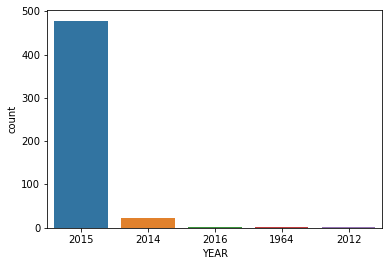

In [11]:
# The visualization of movies per year in Fandango using countplot()
sns.countplot(data=fd, x='YEAR',);

**TASK: What are the 10 movies with the highest number of votes?**

In [12]:
fd.nlargest(n=10, columns='VOTES')[['FILM', 'VOTES']]

,FILM,VOTES
0,Fifty Shades of Grey (2015),34846
1,Jurassic World (2015),34390
2,American Sniper (2015),34085
3,Furious 7 (2015),33538
4,Inside Out (2015),15749
5,The Hobbit: The Battle of the Five Armies (2014),15337
6,Kingsman: The Secret Service (2015),15205
7,Minions (2015),14998
8,Avengers: Age of Ultron (2015),14846
9,Into the Woods (2014),13055


**TASK: How many movies have zero votes?**

In [13]:
zero_votes = fd.loc[fd['VOTES'] == 0, 'FILM'].count()
print('Movies that had zero votes is', zero_votes)

Movies that had zero votes is 69


**TASK: Create DataFrame of only reviewed films by removing any films that have zero votes.**

In [14]:
reviewed_df = fd.loc[fd['VOTES'] != 0]
reviewed_df

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015
431,The Intern (2015),5.0,5.0,1,2015
432,The Park Bench (2015),5.0,5.0,1,2015
433,The Wanted 18 (2015),5.0,5.0,1,2015


----

**As noted in the article, due to HTML and star rating displays, the true user rating may be slightly different than the rating shown to a user. Let's visualize this difference in distributions.**

**TASK: Create a KDE plot (or multiple kdeplots) that displays the distribution of ratings that are displayed (STARS) versus what the true rating was from votes (RATING). Clip the KDEs to 0-5.**

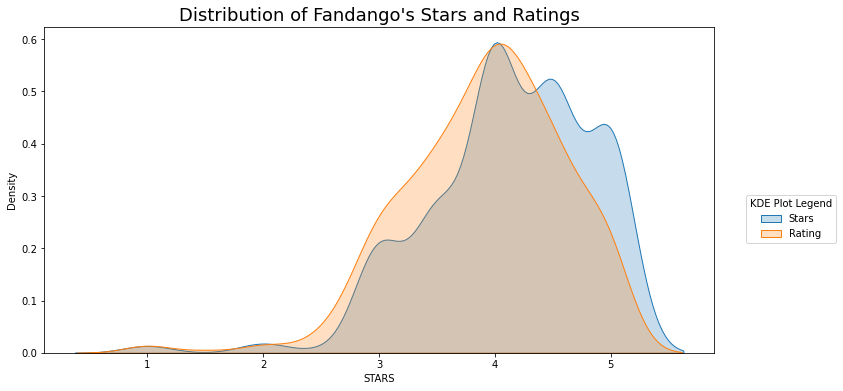

In [15]:
# Insights: The Stars column are shifted to right because of the rounding up of the average score of the movie
plt.figure(figsize=(12, 6))
sns.kdeplot(data=reviewed_df, x='STARS', shade=True,)
sns.kdeplot(data=reviewed_df, x='RATING', shade=True)
plt.legend(['Stars', 'Rating'], bbox_to_anchor=(1.19, 0.5), title='KDE Plot Legend')
plt.title('Distribution of Fandango\'s Stars and Ratings', fontsize=18);

**TASK: Let's now actually quantify this discrepancy. Create a new column of the different between STARS displayed versus true RATING. Calculate this difference with STARS-RATING and round these differences to the nearest decimal point.**

In [16]:
reviewed_df['DISCREPANCY'] = round(reviewed_df['STARS'] - reviewed_df['RATING'], 1)
reviewed_df.head()

C:\anaconda\envs\ml_environment\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,FILM,STARS,RATING,VOTES,YEAR,DISCREPANCY
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0


**TASK: Create a count plot to display the number of times a certain difference occurs:**

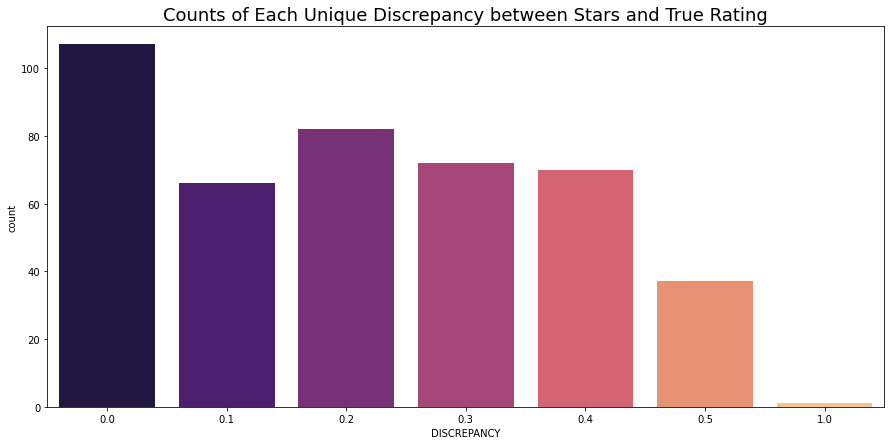

In [92]:
plt.figure(figsize=(15, 7))
plt.title('Counts of Each Unique Discrepancy between Stars and True Rating', fontsize=18)
sns.countplot(data=reviewed_df, x='DISCREPANCY', palette='magma');

**TASK: We can see from the plot that one movie was displaying over a 1 star difference than its true rating! What movie had this close to 1 star differential?**

In [18]:
reviewed_df.loc[reviewed_df['DISCREPANCY'] == 1,:]

,FILM,STARS,RATING,VOTES,YEAR,DISCREPANCY
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


## Part Three: Comparison of Fandango Ratings to Other Sites

Let's now compare the scores from Fandango to other movies sites and see how they compare.

**TASK: Read in the "all_sites_scores.csv" file by running the cell below**

In [19]:
all_sites = pd.read_csv("all_sites_scores.csv")
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


**TASK: Explore the DataFrame columns, info, description.**

In [20]:
# all_sites columns
all_sites.columns

Index(['FILM', 'RottenTomatoes', 'RottenTomatoes_User', 'Metacritic',
       'Metacritic_User', 'IMDB', 'Metacritic_user_vote_count',
       'IMDB_user_vote_count'],
      dtype='object')

In [21]:
# Column information
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


In [22]:
# Statistical summary of the DataFrame
all_sites.describe().T

,count,mean,std,min,25%,50%,75%,max
RottenTomatoes,146.0,60.849315,30.168799,5.0,31.25,63.50,89.00,100.0
RottenTomatoes_User,146.0,63.876712,20.024430,20.0,50.00,66.50,81.00,94.0
Metacritic,146.0,58.808219,19.517389,13.0,43.50,59.00,75.00,94.0
Metacritic_User,146.0,6.519178,1.510712,2.4,5.70,6.85,7.50,9.6
IMDB,146.0,6.736986,0.958736,4.0,6.30,6.90,7.40,8.6
Metacritic_user_vote_count,146.0,185.705479,316.606515,4.0,33.25,72.50,168.50,2375.0
IMDB_user_vote_count,146.0,42846.205479,67406.509171,243.0,5627.00,19103.00,45185.75,334164.0


In [23]:
print('The length of the all_site\'s data rows is',len(all_sites))

The length of the all_site's data rows is 146


### Rotten Tomatoes

Let's first take a look at Rotten Tomatoes. RT has two sets of reviews, their critics reviews (ratings published by official critics) and user reviews. 

**TASK: Create a scatterplot exploring the relationship between RT Critic reviews and RT User reviews.**

Text(0.5, 1.0, 'The Relationship Between RT Critic and RT User Reviews')

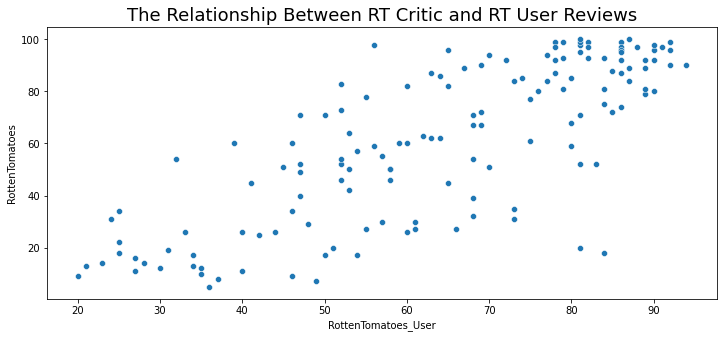

In [24]:
# Moderate/ Medium correlation between RT Critic reviews and RT User reviews.
plt.figure(figsize=(12, 5))
sns.scatterplot(data=all_sites, x='RottenTomatoes_User', y='RottenTomatoes');
plt.title("The Relationship Between RT Critic and RT User Reviews", fontsize=18)

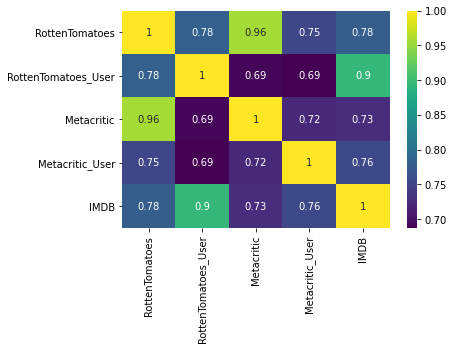

In [25]:
sns.heatmap(all_sites.drop(['Metacritic_user_vote_count', 'IMDB_user_vote_count'], axis=1).corr(), cmap='viridis', annot=True);

Let's quantify this difference by comparing the critics ratings and the RT User ratings. We will calculate this with RottenTomatoes-RottenTomatoes_User. Note: Rotten_Diff here is Critics - User Score. So values closer to 0 means aggrement between Critics and Users. Larger positive values means critics rated much higher than users. Larger negative values means users rated much higher than critics.

**TASK: Create a new column based off the difference between critics ratings and users ratings for Rotten Tomatoes. Calculate this with RottenTomatoes-RottenTomatoes_User**

In [26]:
# Larger positive - Critics rated much higher than users
# Larger Negative - Users rated much higher than critics
all_sites['Rotten_Diff'] = all_sites['RottenTomatoes'] - all_sites['RottenTomatoes_User']
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14


Let's now compare the overall mean difference. Since we're dealing with differences that could be negative or positive, first take the absolute value of all the differences, then take the mean. This would report back on average to absolute difference between the critics rating versus the user rating.

**TASK: Calculate the Mean Absolute Difference between RT scores and RT User scores as described above.**

In [27]:
print('The mean difference between RT users and critics:', all_sites['Rotten_Diff'].agg(abs).mean())

The mean difference between RT users and critics: 15.095890410958905


**TASK: Plot the distribution of the differences between RT Critics Score and RT User Score. There should be negative values in this distribution plot. Feel free to use KDE or Histograms to display this distribution.**

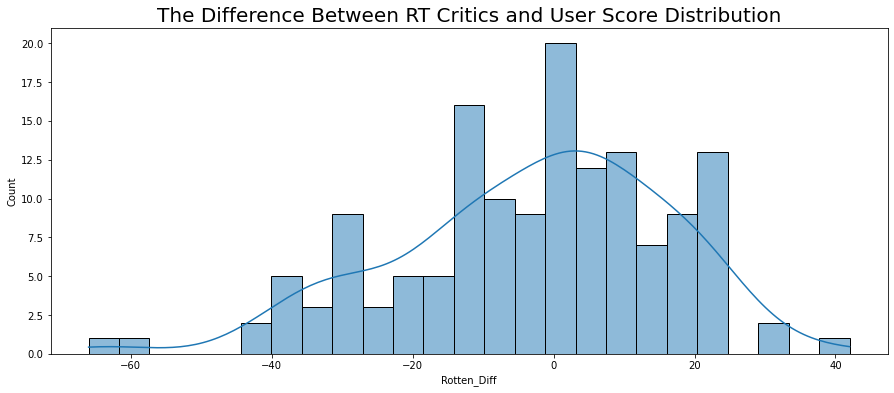

In [28]:
# This is the distribution of RT critics - User score Distribution
plt.figure(figsize=(15,6))
sns.histplot(data=all_sites, x='Rotten_Diff', kde=True, bins=25, linewidth=1)
plt.title('The Difference Between RT Critics and User Score Distribution', fontsize=20);

**TASK: Now create a distribution showing the *absolute value* difference between Critics and Users on Rotten Tomatoes.**

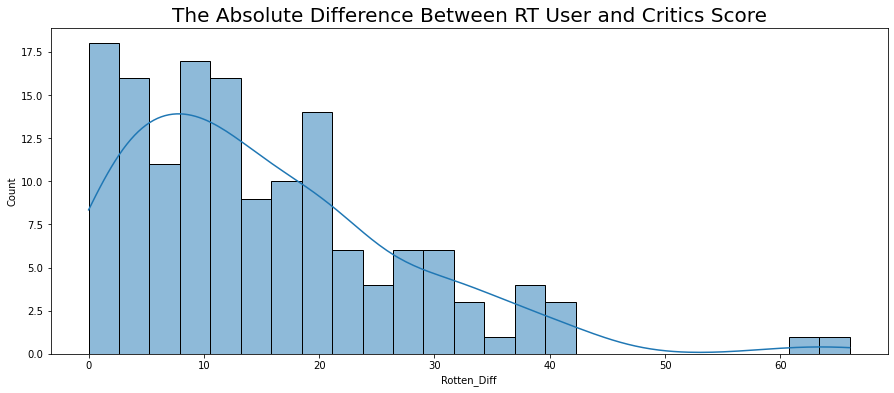

In [29]:
# The absolute diiference distribution of RT User and Critics Score
rt_abs = all_sites['Rotten_Diff'].agg(abs)

plt.figure(figsize=(15,6))
sns.histplot(rt_abs, bins=25, kde=True)
plt.title('The Absolute Difference Between RT User and Critics Score', fontsize=20);

**Let's find out which movies are causing the largest differences. First, show the top 5 movies with the largest *negative* difference between Users and RT critics. Since we calculated the difference as Critics Rating - Users Rating, then large negative values imply the users rated the movie much higher on average than the critics did.**

**TASK: What are the top 5 movies users rated higher than critics on average:**

In [30]:
# Top 5 negative difference between Critics Rating - Users Rating
# Implies the users rated the movie much higher on average than the critics did
all_sites.nsmallest(5, columns='Rotten_Diff')[['FILM', 'Rotten_Diff']]

,FILM,Rotten_Diff
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
105,Hitman: Agent 47 (2015),-42
134,The Longest Ride (2015),-42
125,The Wedding Ringer (2015),-39


**TASK: Now show the top 5 movies critics scores higher than users on average.**

In [31]:
# Top 5 movies that has critics scores higher than users on average
all_sites.nlargest(5, columns='Rotten_Diff')[['FILM', 'Rotten_Diff']]

,FILM,Rotten_Diff
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
37,Welcome to Me (2015),24
40,I'll See You In My Dreams (2015),24


## MetaCritic

Now let's take a quick look at the ratings from MetaCritic. Metacritic also shows an average user rating versus their official displayed rating.

**TASK: Display a scatterplot of the Metacritic Rating versus the Metacritic User rating.**

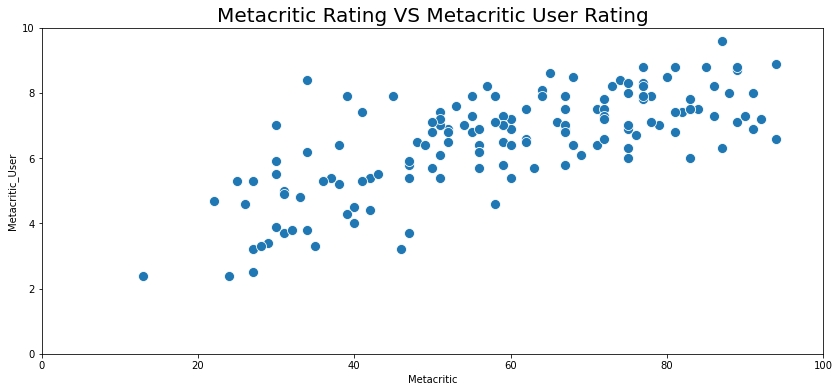

In [32]:
# Metacritic critics score vs user had 0.72 medium relationship 
plt.figure(figsize=(14,6))
plt.title('Metacritic Rating VS Metacritic User Rating', fontsize=20)
plt.xlim(0,100)
plt.ylim(0,10)
sns.scatterplot(data=all_sites, x='Metacritic', y='Metacritic_User', s=100);

## IMDB

Finally let's explore IMDB. Notice that both Metacritic and IMDB report back vote counts. Let's analyze the most popular movies.

**TASK: Create a scatterplot for the relationship between vote counts on MetaCritic versus vote counts on IMDB.**

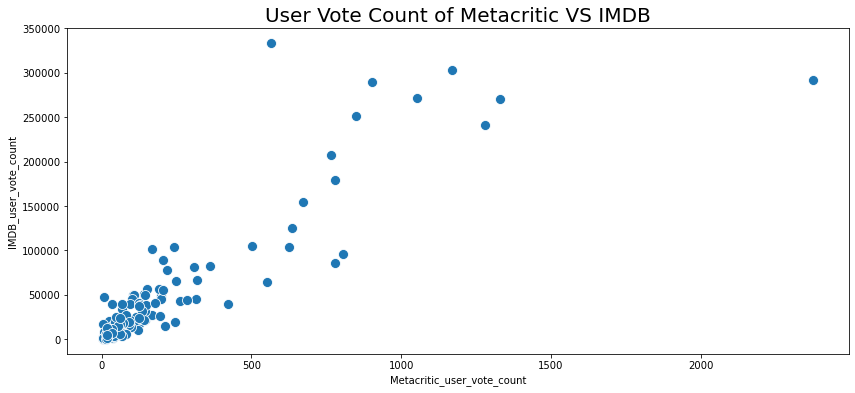

In [33]:
plt.figure(figsize=(14, 6))
plt.title('User Vote Count of Metacritic VS IMDB', fontsize=20)
sns.scatterplot(data=all_sites, x='Metacritic_user_vote_count', y='IMDB_user_vote_count', s=100);

**Notice there are two outliers here. The movie with the highest vote count on IMDB only has about 500 Metacritic ratings. What is this movie?**

**TASK: What movie has the highest IMDB user vote count?**

In [34]:
# First outlier in y-axis
all_sites.nlargest(1, columns='IMDB_user_vote_count')[['FILM','Metacritic_user_vote_count', 'IMDB_user_vote_count']]

,FILM,Metacritic_user_vote_count,IMDB_user_vote_count
14,The Imitation Game (2014),566,334164


**TASK: What movie has the highest Metacritic User Vote count?**

In [35]:
# Second outlier in x-axis
all_sites.nlargest(1, columns='Metacritic_user_vote_count')[['FILM','Metacritic_user_vote_count', 'IMDB_user_vote_count']]

,FILM,Metacritic_user_vote_count,IMDB_user_vote_count
88,Mad Max: Fury Road (2015),2375,292023


## Fandago Scores vs. All Sites

Finally let's begin to explore whether or not Fandango artificially displays higher ratings than warranted to boost ticket sales.

**TASK: Combine the Fandango Table with the All Sites table. Not every movie in the Fandango table is in the All Sites table, since some Fandango movies have very little or no reviews. We only want to compare movies that are in both DataFrames, so do an *inner* merge to merge together both DataFrames based on the FILM columns.**

In [36]:
# Merging Fandango and All_sites data using inner join
df = pd.merge(fd, all_sites, on='FILM', how='inner')
df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 144
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   STARS                       145 non-null    float64
 2   RATING                      145 non-null    float64
 3   VOTES                       145 non-null    int64  
 4   YEAR                        145 non-null    object 
 5   RottenTomatoes              145 non-null    int64  
 6   RottenTomatoes_User         145 non-null    int64  
 7   Metacritic                  145 non-null    int64  
 8   Metacritic_User             145 non-null    float64
 9   IMDB                        145 non-null    float64
 10  Metacritic_user_vote_count  145 non-null    int64  
 11  IMDB_user_vote_count        145 non-null    int64  
 12  Rotten_Diff                 145 non-null    int64  
dtypes: float64(4), int64(7), object(2)


In [38]:
df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8


### Normalize columns to Fandango STARS and RATINGS 0-5 

Notice that RT,Metacritic, and IMDB don't use a score between 0-5 stars like Fandango does. In order to do a fair comparison, we need to *normalize* these values so they all fall between 0-5 stars and the relationship between reviews stays the same.

**TASK: Create new normalized columns for all ratings so they match up within the 0-5 star range shown on Fandango. There are many ways to do this.**

Hint link: https://stackoverflow.com/questions/26414913/normalize-columns-of-pandas-data-frame


Easier Hint:

Keep in mind, a simple way to convert ratings:
* 100/20 = 5 
* 10/2 = 5

In [93]:
# Function to normalize like Fandango stars score
def normalize_to_fd(df):
    norm = (df/10) * 5 if (df.max() <= 10) else (df/100) * 5
    return np.round(norm, 1)

# Apply the function to normalize it.
# if max <= 10, the denominator is 10 else 100
df['RT_Norm'] = normalize_to_fd(df['RottenTomatoes'])
df['RTU_Norm'] = normalize_to_fd(df['RottenTomatoes_User'])
df['Metacritic_Norm'] = normalize_to_fd(df['Metacritic'])
df['Metacritic_User_Norm'] = normalize_to_fd(df['Metacritic_User'])
df['IMDB_Norm'] = normalize_to_fd(df['IMDB'])

df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,RT_Norm,RTU_Norm,Metacritic_Norm,Metacritic_User_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10,3.6,4.1,2.9,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3,4.1,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8,4.9,4.5,4.7,4.4,4.3


**TASK: Now create a norm_scores DataFrame that only contains the normalizes ratings. Include both STARS and RATING from the original Fandango table.**

In [40]:
# DataFrame of all normalizes ratings including Fandango
norm_scores = df[['STARS', 'RATING', 'RT_Norm', 'RTU_Norm', 'Metacritic_Norm', 'Metacritic_User_Norm', 'IMDB_Norm']]
norm_scores.head()

,STARS,RATING,RT_Norm,RTU_Norm,Metacritic_Norm,Metacritic_User_Norm,IMDB_Norm
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,3.6,4.1,2.9,3.5,3.6
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,5.0,4.8,4.1,4.2,3.4,3.4,3.7
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3


### Comparing Distribution of Scores Across Sites


Now the moment of truth! Does Fandango display abnormally high ratings? We already know it pushs displayed RATING higher than STARS, but are the ratings themselves higher than average?


**TASK: Create a plot comparing the distributions of normalized ratings across all sites. There are many ways to do this, but explore the Seaborn KDEplot docs for some simple ways to quickly show this. Don't worry if your plot format does not look exactly the same as ours, as long as the differences in distribution are clear.**

Quick Note if you have issues moving the legend for a seaborn kdeplot: https://github.com/mwaskom/seaborn/issues/2280

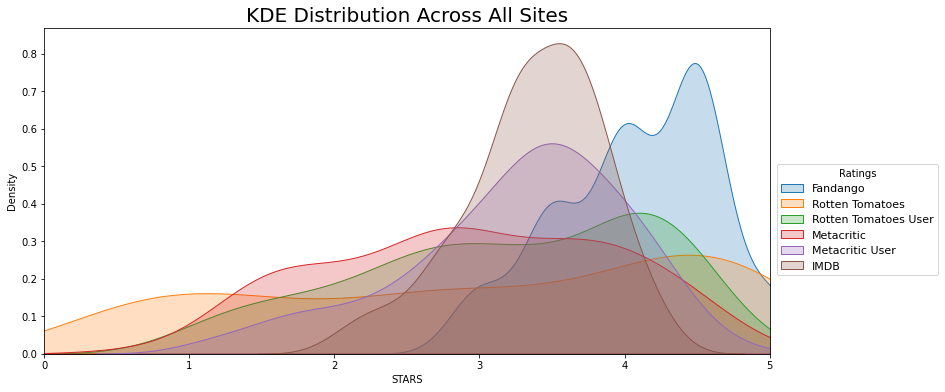

In [94]:
# Insights:
# - Fandango scoring is left skewed only on the value of 3 - 5 (peak)
# - RT (most uniform), RT user, and Metacritic is uniform distribution
# - Metacritic user is left skewed on the value (1 - 5)
# - IMDB is Normal between 2.5 and 4.5

plt.figure(figsize=(13, 6))
plt.title("KDE Distribution Across All Sites", fontsize=20)
sns.kdeplot(data=norm_scores, x='STARS', shade=True, label='Fandango')
sns.kdeplot(data=norm_scores, x='RT_Norm', shade=True, label='Rotten Tomatoes')
sns.kdeplot(data=norm_scores, x='RTU_Norm', shade=True, label='Rotten Tomatoes User')
sns.kdeplot(data=norm_scores, x='Metacritic_Norm', shade=True, label='Metacritic')
sns.kdeplot(data=norm_scores, x='Metacritic_User_Norm', shade=True, label='Metacritic User')
sns.kdeplot(data=norm_scores, x='IMDB_Norm', shade=True, label='IMDB')
plt.legend(title='Ratings',bbox_to_anchor=(1.24,0.6), fontsize=11)
plt.xlim(0,5);

**Clearly Fandango has an uneven distribution. We can also see that RT critics have the most uniform distribution. Let's directly compare these two.** 

**TASK: Create a KDE plot that compare the distribution of RT critic ratings against the STARS displayed by Fandango.**

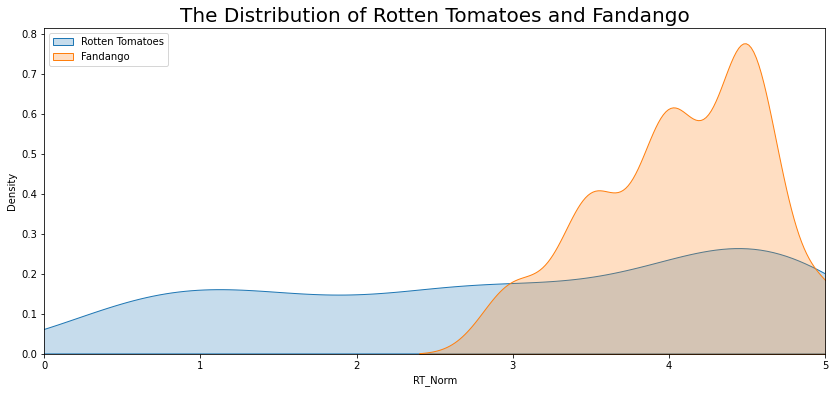

In [69]:
# Obviously, the distribution of Fandango is bias in scoring for me
plt.figure(figsize=(14, 6))
plt.title('The Distribution of Rotten Tomatoes and Fandango', fontsize=20)
plt.xlim(0,5)
sns.kdeplot(data=norm_scores, x='RT_Norm', shade=True, label='Rotten Tomatoes')
sns.kdeplot(data=norm_scores, x='STARS', shade=True, label='Fandango')
plt.legend(loc=2);

**OPTIONAL TASK: Create a histplot comparing all normalized scores.**

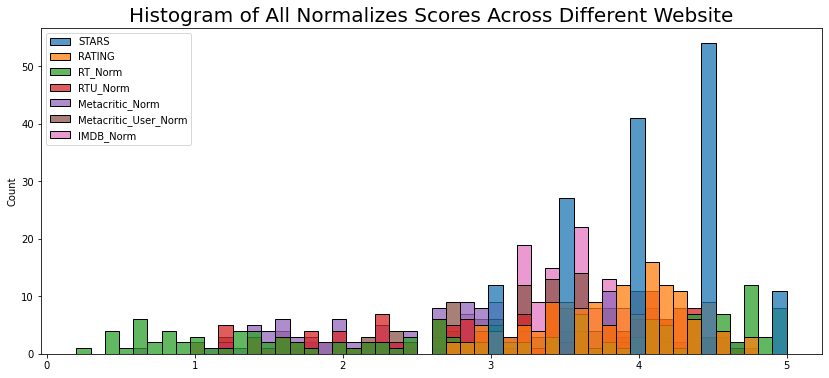

In [43]:
# The histogram across different websites
plt.figure(figsize=(14, 6))
plt.title("Histogram of All Normalizes Scores Across Different Website", fontsize=20)
sns.histplot(data=norm_scores, bins=50);


### How are the worst movies rated across all platforms?

**TASK: Create a clustermap visualization of all normalized scores. Note the differences in ratings, highly rated movies should be clustered together versus poorly rated movies. Note: This clustermap does not need to have the FILM titles as the index, feel free to drop it for the clustermap.**

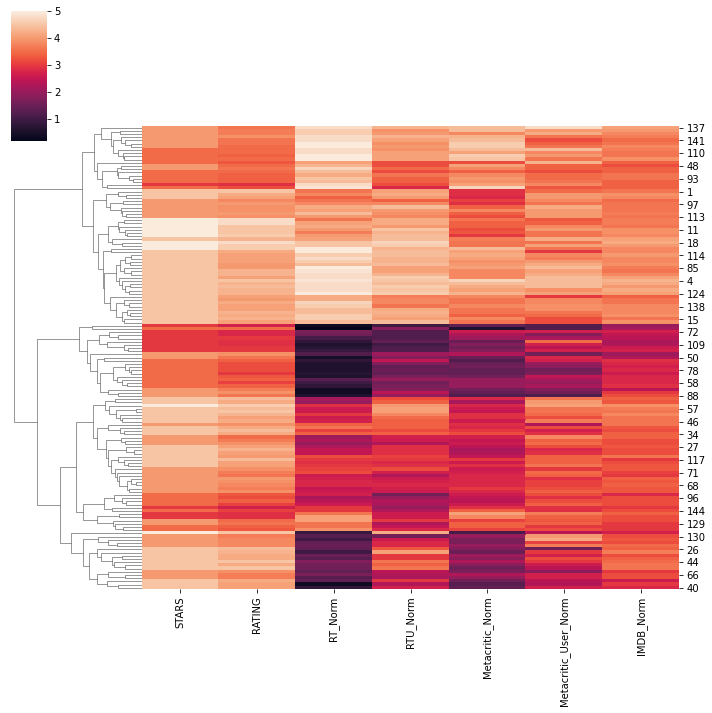

In [44]:
sns.clustermap(norm_scores, col_cluster=False);

**TASK: Clearly Fandango is rating movies much higher than other sites, especially considering that it is then displaying a rounded up version of the rating. Let's examine the top 10 worst movies. Based off the Rotten Tomatoes Critic Ratings, what are the top 10 lowest rated movies? What are the normalized scores across all platforms for these movies? You may need to add the FILM column back in to your DataFrame of normalized scores to see the results.**

In [57]:
# Top 10 Worst movies in Rottent Tomatotoes and its corresponding rating to other movie sites.
top_ten = df.nsmallest(10, columns='RT_Norm')[['FILM', 'STARS', 'RATING', 'RT_Norm', 'RTU_Norm', 'Metacritic_Norm', 'Metacritic_User_Norm', 'IMDB_Norm']]
top_ten

,FILM,STARS,RATING,RT_Norm,RTU_Norm,Metacritic_Norm,Metacritic_User_Norm,IMDB_Norm
49,Paul Blart: Mall Cop 2 (2015),3.5,3.5,0.2,1.8,0.6,1.2,2.2
25,Taken 3 (2015),4.5,4.1,0.4,2.3,1.3,2.3,3.0
28,Fantastic Four (2015),3.0,2.7,0.4,1.0,1.4,1.2,2.0
54,Hot Pursuit (2015),4.0,3.7,0.4,1.8,1.6,1.8,2.4
84,Hitman: Agent 47 (2015),4.0,3.9,0.4,2.4,1.4,1.6,3.0
50,The Boy Next Door (2015),4.0,3.6,0.5,1.8,1.5,2.8,2.3
77,Seventh Son (2015),3.5,3.2,0.6,1.8,1.5,2.0,2.8
78,Mortdecai (2015),3.5,3.2,0.6,1.5,1.4,1.6,2.8
83,Sinister 2 (2015),3.5,3.3,0.6,1.7,1.6,2.5,2.8
87,Unfinished Business (2015),3.5,3.2,0.6,1.4,1.6,1.9,2.7


**FINAL TASK: Visualize the distribution of ratings across all sites for the top 10 worst movies.**

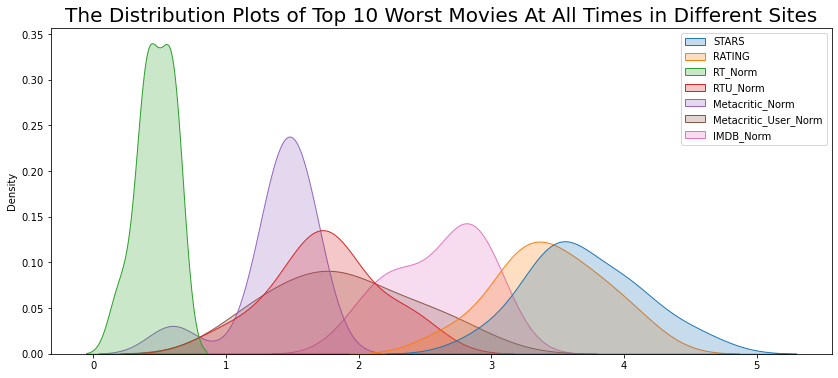

In [65]:
# Final Insights:
# clearly Fandango is rating movies much higher than other sites
plt.figure(figsize=(14, 6))
plt.title('The Distribution Plots of Top 10 Worst Movies At All Times in Different Sites', fontsize=20)
sns.kdeplot(data=top_ten, shade=True);

---
----

<img src="https://upload.wikimedia.org/wikipedia/en/6/6f/Taken_3_poster.jpg">

**Final thoughts: Wow! Fandango is showing around 3-4 star ratings for films that are clearly bad! Notice the biggest offender, [Taken 3!](https://www.youtube.com/watch?v=tJrfImRCHJ0). Fandango is displaying 4.5 stars on their site for a film with an [average rating of 1.86](https://en.wikipedia.org/wiki/Taken_3#Critical_response) across the other platforms!**

In [88]:
df.iloc[25][['STARS', 'RATING', 'RT_Norm', 'RTU_Norm', 'Metacritic_Norm', 'Metacritic_User_Norm', 'IMDB_Norm', 'FILM']]

STARS                              4.5
RATING                             4.1
RT_Norm                            0.4
RTU_Norm                           2.3
Metacritic_Norm                    1.3
Metacritic_User_Norm               2.3
IMDB_Norm                          3.0
FILM                    Taken 3 (2015)
Name: 25, dtype: object

In [89]:
0.4+2.3+1.3+2.3+3.0

9.3

In [91]:
print('The average rating of Taken 3 across the other platforms: ', 9.3/5)

The average rating of Taken 3 across the other platforms:  1.86
